# Ayush Mathur
# 18065

In this Jupyter notebook I am going to play with the GATZN dataset using the CNN techniques.

Therefore, first wee need to download and unzip it.

In [ ]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz
!tar -xvzf genres.tar.gz

--2021-04-25 10:36:47--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  1.86MB/s    in 10m 37s 

2021-04-25 10:47:24 (1.83 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/ro

# Importing libraries and loading data
Now, that we have downloaded the files, we can start exploring the data.

### Basic Libraries

In [ ]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras
from keras import models
from keras import layers

import warnings
warnings.filterwarnings('ignore')

# Creating Spectrograms
Now we will create spectograms from the audiofiles and save them.

In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

# Extracting Wave Features 
Audio signals are inherently different from the other usual data we use. therefore, we need to extract wave features from the audio files.

The audio files have been saved in different in folders and therefore, we cannot directly extract features. First we will create an empty text file and then write the features from each audio file in it, one by one.

In [ ]:
# Now I'll define a list containing all the relevent features, to define my csv
features = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'.split()

# Other than the above features, there are some 20 other features, classified under mfcc
for i in range(1, 21):
    features.append( f'mfcc{i}')
features.append('label')
print(features)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


# Note
Since I did not have enough data in my internet plan to download the whole dataset and extract features offline, i used this notebook, which was run on google colab to create the features csv and download that directly.

In [ ]:
# Creating the CSV and writing the header using features list defined above
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(features)

# We will also need the list of all genres in the data
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
print(genres)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Now, we will iterate over genres, according to which files have been saved and then extract features. These extracted features will be written in the csv.

In [ ]:
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        rmse = librosa.feature.rmse(y=y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

Now we can read the data from the csv in pandas dataframe

In [ ]:
data = pd.read_csv('data.csv')
data.sample(10)

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
636,metal.00007.wav,0.581357,0.069500,2939.523998,2522.778213,5806.856553,0.168373,-108.066968,65.770554,-20.833780,47.558105,0.861492,8.988717,-3.207442,20.976620,-10.341530,7.872308,-8.122289,12.043259,-9.148092,7.006191,-8.747401,5.782763,-12.363865,3.441504,-7.371762,4.869835,metal
788,pop.00088.wav,0.431417,0.235034,3510.795237,3148.742937,7257.122784,0.172034,-42.659503,54.891098,17.067766,19.767503,6.855518,2.780960,11.818727,1.204243,7.938465,1.138006,-4.074650,0.133129,-4.237505,-4.456264,-2.512467,-2.891958,0.620919,0.900093,2.309359,1.926414,pop
344,disco.00092.wav,0.370713,0.106738,2458.014671,2400.826659,5268.993139,0.117533,-123.758728,89.820369,-1.835922,51.168044,-16.255472,28.280064,-12.492997,19.027592,-13.277663,18.497355,-13.773045,12.863650,-8.753745,8.256735,-8.235455,5.515674,-8.405373,4.477823,0.311925,1.830309,disco
723,pop.00029.wav,0.354726,0.234200,2988.833127,3143.055984,6919.441492,0.111570,-40.497355,73.476332,22.623438,12.352274,14.859225,8.943520,5.305410,9.026267,2.087308,4.300650,-3.135578,1.843104,2.032261,1.393087,4.121323,-0.356495,-0.752612,1.157183,0.737947,-0.044849,pop
518,jazz.00008.wav,0.357398,0.118614,1304.575756,1636.561792,2723.916862,0.046275,-189.889800,134.417420,-25.671047,45.737574,8.203896,21.443686,-4.573497,14.383875,-12.654487,10.276300,-7.929965,-1.141196,-5.041017,2.413433,-5.010100,-2.155745,-4.240500,1.840860,-0.440288,-4.768059,jazz
719,pop.00062.wav,0.329643,0.398012,2468.524671,2625.135158,5481.708520,0.098209,-6.910643,68.869665,3.766723,28.205854,2.295240,13.618963,1.038284,6.009476,2.759500,15.026862,-8.785013,0.795705,-7.226572,2.920423,0.558214,11.373525,11.489994,14.183652,-0.920825,0.812345,pop
783,pop.00001.wav,0.412941,0.262414,3702.987869,3431.805841,8073.092850,0.149476,-59.197684,45.251973,36.837734,15.681740,15.643535,1.682025,7.307881,8.833310,5.848406,8.018320,-2.257629,1.909457,-0.920844,0.032961,0.087093,-0.832902,5.581455,3.830308,5.577998,4.921804,pop
627,metal.00095.wav,0.529131,0.185565,2445.226841,2330.741065,5191.401942,0.121036,-35.320029,94.132000,-24.248816,43.301719,-16.372783,29.512967,-5.849619,28.460053,-13.954538,13.736810,-9.196753,15.597110,-8.487801,11.407173,-6.134500,9.320328,-6.612436,3.502451,-3.285450,3.665256,metal
682,metal.00056.wav,0.463511,0.242997,3010.816263,2386.851872,5633.374269,0.179329,12.002085,69.415081,-23.265212,60.705879,-20.811406,25.095438,-16.193770,15.550598,-10.501775,18.771073,-13.389449,17.366584,-11.057059,10.266262,-8.709675,8.183140,-4.955764,5.419009,-5.493763,9.079560,metal
850,reggae.00080.wav,0.477079,0.195810,2538.855932,2644.407237,5260.418191,0.094315,-103.100181,67.214359,2.227922,28.502852,4.177965,11.880091,14.264167,14.303763,3.261563,15.853006,8.041330,4.467561,8.684822,8.065409,7.983838,5.036039,3.740159,-0.327761,-0.940888,-1.087156,reggae


# Using Convolutional techniques on the Spectogram data
Now we will apply our methods on the spectogram data.

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [ ]:
import PIL

In [ ]:
im = PIL.Image.open("/content/img_data/country/country00000.png")
im.size

(720, 720)

In [ ]:
import pathlib
data_dir = pathlib.Path("img_data")

In [ ]:
batch_size = 32
img_height = 720
img_width = 720

# Importing datset
Since the dataset is big, we need to channel it using methods

In [ ]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 10 classes.
Using 800 files for training.


In [ ]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 10 classes.
Using 200 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


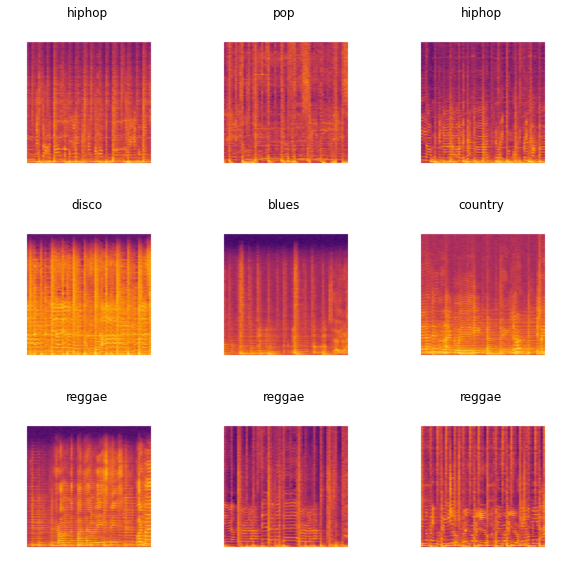

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 720, 720, 3)
(32,)


In [ ]:
import tensorflow
AUTOTUNE = tensorflow.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1/255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.023529414 1.0


# Lets create our first CNN model
In this model, I'll start by using a large kernel size, and the sigmoid activation for each layer. I will then modifuy this model subsequently to better my results.

In [ ]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 12, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 720, 720, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 720, 720, 16)      6928      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 360, 360, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 360, 360, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 180, 180, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 64)        0

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
25/25 [==============================] - 17s 678ms/step - loss: 142.2659 - accuracy: 0.0850 - val_loss: 2.3504 - val_accuracy: 0.0750
Epoch 2/20
25/25 [==============================] - 13s 504ms/step - loss: 2.3175 - accuracy: 0.1037 - val_loss: 2.3033 - val_accuracy: 0.0700
Epoch 3/20
25/25 [==============================] - 13s 502ms/step - loss: 2.3025 - accuracy: 0.1025 - val_loss: 2.3036 - val_accuracy: 0.0800
Epoch 4/20
25/25 [==============================] - 13s 503ms/step - loss: 2.3048 - accuracy: 0.1037 - val_loss: 2.3040 - val_accuracy: 0.0800
Epoch 5/20
25/25 [==============================] - 13s 506ms/step - loss: 2.3024 - accuracy: 0.1025 - val_loss: 2.3044 - val_accuracy: 0.0700
Epoch 6/20
25/25 [==============================] - 13s 509ms/step - loss: 2.3023 - accuracy: 0.1000 - val_loss: 2.3047 - val_accuracy: 0.0800
Epoch 7/20
25/25 [==============================] - 13s 510ms/step - loss: 2.3022 - accuracy: 0.1050 - val_loss: 2.3051 - val_accuracy: 0.08

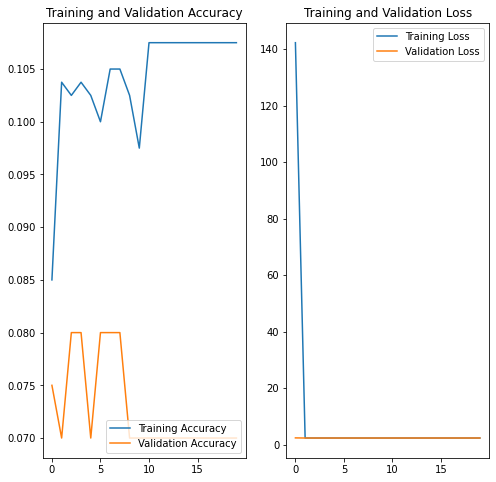

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Switching to relu

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 12, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
25/25 [==============================] - 13s 508ms/step - loss: 6.1228 - accuracy: 0.1213 - val_loss: 2.2893 - val_accuracy: 0.0900
Epoch 2/20
25/25 [==============================] - 12s 489ms/step - loss: 2.1936 - accuracy: 0.1787 - val_loss: 2.1706 - val_accuracy: 0.1800
Epoch 3/20
25/25 [==============================] - 12s 490ms/step - loss: 2.0590 - accuracy: 0.2763 - val_loss: 2.1956 - val_accuracy: 0.2200
Epoch 4/20
25/25 [==============================] - 12s 491ms/step - loss: 1.9760 - accuracy: 0.2862 - val_loss: 2.0660 - val_accuracy: 0.2150
Epoch 5/20
25/25 [==============================] - 12s 491ms/step - loss: 1.8175 - accuracy: 0.3413 - val_loss: 2.1642 - val_accuracy: 0.2350
Epoch 6/20
25/25 [==============================] - 12s 490ms/step - loss: 1.7629 - accuracy: 0.3562 - val_loss: 2.0590 - val_accuracy: 0.2900
Epoch 7/20
25/25 [==============================] - 12s 490ms/step - loss: 1.7263 - accuracy: 0.3762 - val_loss: 1.8906 - val_accuracy: 0.3000

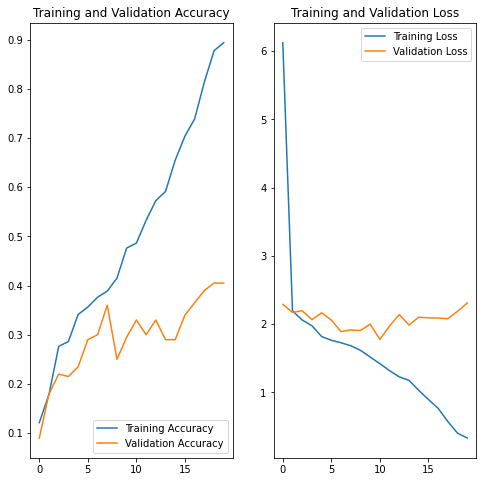

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

There is high degree of variability in the m\above model. Different runs give different results.

# Changing kernal
It seems the large kernal size is a problem. Since the rhythmic nature calls for greater focus on the time dimension, I'll use a (2,1) kernal

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (2,1), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
25/25 [==============================] - 8s 303ms/step - loss: 7.0270 - accuracy: 0.1363 - val_loss: 2.2313 - val_accuracy: 0.1900
Epoch 2/20
25/25 [==============================] - 8s 303ms/step - loss: 2.1068 - accuracy: 0.2375 - val_loss: 2.1161 - val_accuracy: 0.2400
Epoch 3/20
25/25 [==============================] - 8s 303ms/step - loss: 2.0287 - accuracy: 0.2637 - val_loss: 2.1381 - val_accuracy: 0.2050
Epoch 4/20
25/25 [==============================] - 8s 303ms/step - loss: 1.9357 - accuracy: 0.2925 - val_loss: 1.9639 - val_accuracy: 0.2650
Epoch 5/20
25/25 [==============================] - 8s 302ms/step - loss: 1.8507 - accuracy: 0.3262 - val_loss: 1.9867 - val_accuracy: 0.2650
Epoch 6/20
25/25 [==============================] - 8s 301ms/step - loss: 1.7865 - accuracy: 0.3275 - val_loss: 2.0684 - val_accuracy: 0.2300
Epoch 7/20
25/25 [==============================] - 8s 303ms/step - loss: 1.7650 - accuracy: 0.3388 - val_loss: 1.9249 - val_accuracy: 0.2800
Epoch 

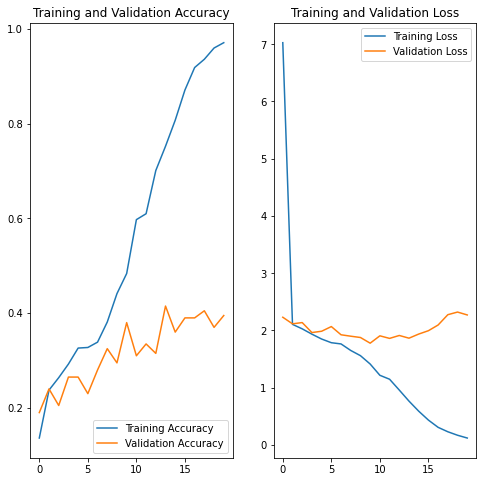

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Flipping the kernel size

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (1,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
25/25 [==============================] - 7s 273ms/step - loss: 6.9108 - accuracy: 0.1400 - val_loss: 2.2260 - val_accuracy: 0.1900
Epoch 2/20
25/25 [==============================] - 7s 271ms/step - loss: 2.0216 - accuracy: 0.2500 - val_loss: 1.9920 - val_accuracy: 0.2450
Epoch 3/20
25/25 [==============================] - 7s 272ms/step - loss: 1.7608 - accuracy: 0.3650 - val_loss: 2.0896 - val_accuracy: 0.2000
Epoch 4/20
25/25 [==============================] - 7s 272ms/step - loss: 1.6795 - accuracy: 0.3713 - val_loss: 2.0789 - val_accuracy: 0.2500
Epoch 5/20
25/25 [==============================] - 7s 272ms/step - loss: 1.5220 - accuracy: 0.4375 - val_loss: 2.0003 - val_accuracy: 0.2400
Epoch 6/20
25/25 [==============================] - 7s 272ms/step - loss: 1.4467 - accuracy: 0.4800 - val_loss: 1.8105 - val_accuracy: 0.3350
Epoch 7/20
25/25 [==============================] - 7s 272ms/step - loss: 1.2114 - accuracy: 0.5800 - val_loss: 1.8290 - val_accuracy: 0.3200
Epoch 

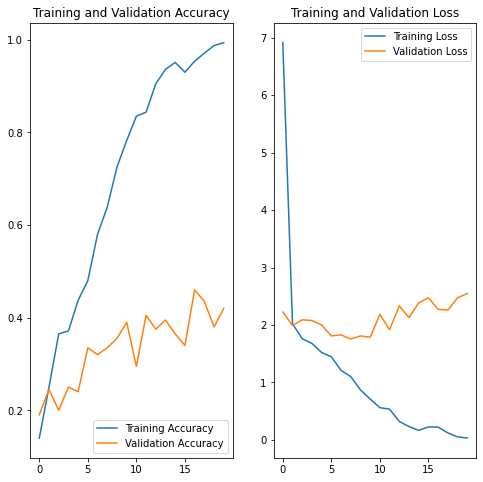

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Now we can try adding droput
we can see that there is a lot of overfitting in the above models.

In [ ]:
from keras.layers import SpatialDropout2D

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=False
)

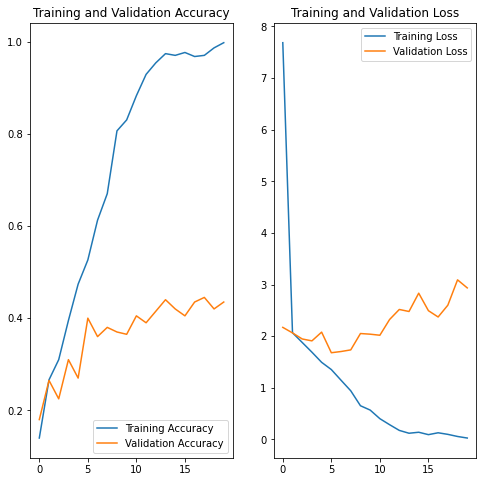

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The results seem to have improved. Lets try adding another layer of dropout.

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 2, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 2, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=False
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Changing Optimizer
Lets try changin the optimizer to RMSprop

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 2, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 2, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='rmsprop',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=False
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Adding con layers with different dimensions
Trying some more things.

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (1,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (1,3), padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Adding more dense layers
Lets try adding some more dense layers

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 2, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 2, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64,activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=False
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Finally applying what we learned

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (1,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  SpatialDropout2D(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=False
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Drawing the Confusion Matrix
Now that we know the best this model can do, lets plot the confusin matrix.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = model.predict(val_ds)

In [ ]:
pred

In [ ]:
pred_n =[]
for elem in pred:
  pred_n.append(list(elem).index(max(elem)))
len(pred_n)

In [ ]:
for x in val_ds:
  print((x[1]))

In [ ]:
val = "3 1 2 6 1 5 6 5 4 0 8 8 0 8 2 8 7 0 6 0 1 4 2 2 3 3 3 2 4 5 3 3 1 4 5 2 8 1 7 0 1 8 2 3 4 6 1 4 6 4 4 0 9 3 4 4 9 4 1 8 4 0 6 3 3 6 9 5 7 3 6 4 2 9 5 6 0 7 7 7 8 8 9 4 9 4 0 0 1 8 9 4 8 7 0 5 3 5 6 0 3 5 6 6 1 7 2 7 4 0 0 8 1 8 8 9 3 4 3 0 4 7 3 7 5 1 2 5 5 3 6 3 2 2 6 4 0 2 4 2 3 0 8 1 4 7 9 0 5 4 8 0 1 5 8 1 8 5 8 9 5 4 0 3 3 5 4 8 9 1 8 2 2 5 9 0 4 7 9 4 8 9 3 1 0 4 3 1 7 0 0 7 8 8 4 0 3 9 3 7"
val = [int(x) for x in val.split()]
print(val)

In [ ]:
confusion_matrix(val,pred_n)

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(confusion_matrix(val,pred_n))

# Conclusion
From the above confusion matrix, we can clealy see that our model performs good enough only for few genres.